# 1. Marwa Alifa Azkiya (202010370311481)
# 2. Fhara Elvina Pingky Nadya (202010370311483)

In [1]:
import pandas as pd
import numpy as np
import string
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Import Libraries
Ini adalah library yang dibutuhkan dalam pengolahan data.

In [2]:
df=pd.read_csv( 'twitter_MBTI.csv' )
df.head()

,Unnamed: 0,text,label
0,0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj
1,1,@Hispanthicckk Being you makes you look cute||...,intj
2,2,@Alshymi Les balles sont réelles et sont tirée...,intj
3,3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj
4,4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj


# Load Dataset
Menampilkan dataset dalam bentuk dataframe.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7811 entries, 0 to 7810
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7811 non-null   int64 
 1   text        7811 non-null   object
 2   label       7811 non-null   object
dtypes: int64(1), object(2)
memory usage: 183.2+ KB


In [4]:
df = df.drop(columns= ["Unnamed: 0"], axis =1)

# Drop Columns
Menghapus kolom yang dirasa tidak diperlukan. Disini kami menghapus kolom "Unnamed:0" karena itu hanya nomor urut saja

<Axes: xlabel='label'>

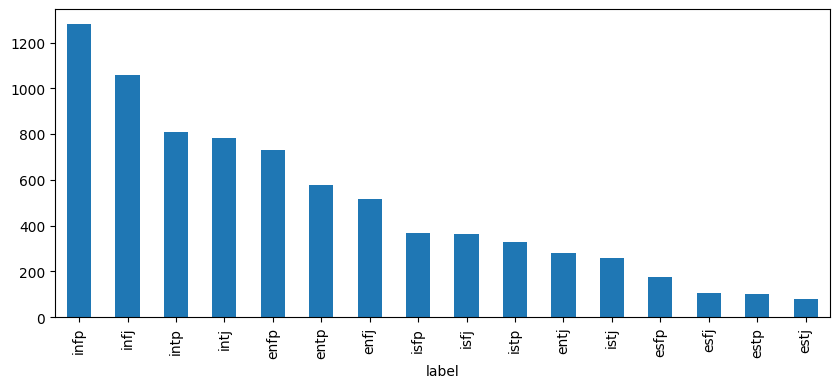

In [5]:
y_label = ['intj','infp','infj','intp','enfp','entj','entp','enfj','istj','istp','isfp','isfj','estj','estp','esfp','esfj']
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar')

# Count the number of each label
Menghitung jumlah dari masing-masing label dengan menggunakan bar plot

In [6]:
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, "", input_txt)
    return input_txt

# Make function remove_pattern
Membuat fungsi yang nantinya akan digunakan untuk menghapus mention pada dataset karena tidak diperlukan dalam pengolahan data

In [7]:
df['twitt'] = np.vectorize(remove_pattern)(df['text'],"@[\w]*")
df.head()

,text,label,twitt
0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj,"The Pope is infallible, this is a catholic ..."
1,@Hispanthicckk Being you makes you look cute||...,intj,"Being you makes you look cute||| On, because ..."
2,@Alshymi Les balles sont réelles et sont tirée...,intj,Les balles sont réelles et sont tirées très r...
3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj,"I'm like entp but idiotic|||Hey boy, do you wa..."
4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj,Give it to ... He has Pica since childhood||...


# Use remove_pattern
Fungsi remove_pattern diaplikasikan pada kolom text. Kemudian untuk hasil dari remove_pattern dapat dilihat pada kolom "twitt" yang dimana mention an telah hilang

In [8]:
df['twitt'] = df['twitt'].str.replace("[^a-zA-Z]"," ")
df.head()

,text,label,twitt
0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj,"The Pope is infallible, this is a catholic ..."
1,@Hispanthicckk Being you makes you look cute||...,intj,"Being you makes you look cute||| On, because ..."
2,@Alshymi Les balles sont réelles et sont tirée...,intj,Les balles sont réelles et sont tirées très r...
3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj,"I'm like entp but idiotic|||Hey boy, do you wa..."
4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj,Give it to ... He has Pica since childhood||...


# Regex
Digunakan untuk menghapus text selain huruf

In [9]:
def casefolding(twitt):
    twitt = twitt.lower()
    twitt = twitt.strip(" ")
    return twitt
df['twitt'] = df['twitt'].apply(casefolding)
df.head()

,text,label,twitt
0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj,"the pope is infallible, this is a catholic dog..."
1,@Hispanthicckk Being you makes you look cute||...,intj,"being you makes you look cute||| on, because t..."
2,@Alshymi Les balles sont réelles et sont tirée...,intj,les balles sont réelles et sont tirées très ra...
3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj,"i'm like entp but idiotic|||hey boy, do you wa..."
4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj,give it to ... he has pica since childhood|||...


# Casefolding
Dilakukan untuk mengubah huruf kapital pada text menjadi huruf kecil

In [10]:
df['twitt'] = df['twitt'].apply(lambda x: x.split())
df.head()

,text,label,twitt
0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj,"[the, pope, is, infallible,, this, is, a, cath..."
1,@Hispanthicckk Being you makes you look cute||...,intj,"[being, you, makes, you, look, cute|||, on,, b..."
2,@Alshymi Les balles sont réelles et sont tirée...,intj,"[les, balles, sont, réelles, et, sont, tirées,..."
3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj,"[i'm, like, entp, but, idiotic|||hey, boy,, do..."
4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj,"[give, it, to, ..., he, has, pica, since, chil..."


# Tokenizing
Digunakan untuk memecah kalimat-kalimat tersebut menjadi kata atau disebut dengan token guna mempermudah proses analisis

In [11]:
def stopword_remove(twitt):
    filtering = stopwords.words('french','english')
    x =[]
    data = []
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, twitt)
    for x in fit:
        data.append(x)
    return data
df['twitt'] = df['twitt'].apply(stopword_remove)
df.head()

,text,label,twitt
0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj,"[the, pope, is, infallible,, this, is, a, cath..."
1,@Hispanthicckk Being you makes you look cute||...,intj,"[being, you, makes, you, look, cute|||, on,, b..."
2,@Alshymi Les balles sont réelles et sont tirée...,intj,"[balles, réelles, tirées, très, rapidement|||,..."
3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj,"[i'm, like, entp, but, idiotic|||hey, boy,, do..."
4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj,"[give, it, to, ..., he, has, pica, since, chil..."


# Filtering
Filtering ini menggunakan stopword_remove. Stopword adalah kata umum yang biasanya muncul dan tidak memiliki makna. Jadi, pada tahap ini akan menghapus kata yang tidak memiliki makna

In [12]:
stemmer = PorterStemmer()
df['twitt'] = df['twitt'].apply(lambda sentence: [stemmer.stem(word) for word in sentence])
df.head()

,text,label,twitt
0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj,"[the, pope, is, infallible,, thi, is, a, catho..."
1,@Hispanthicckk Being you makes you look cute||...,intj,"[be, you, make, you, look, cute|||, on,, becau..."
2,@Alshymi Les balles sont réelles et sont tirée...,intj,"[ball, réell, tiré, trè, rapidement|||, omg, t..."
3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj,"[i'm, like, entp, but, idiotic|||hey, boy,, do..."
4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj,"[give, it, to, ..., he, ha, pica, sinc, childh..."


# Stemmer
Diperlukan untuk memperkecil jumlah indeks yang berbeda dari satu data sehingga sebuah kata yang memiliki suffix maupun prefix akan kembali ke bentuk dasarnya

In [13]:
split = df['label'].apply(lambda x: pd.Series(list(x)))
split.columns= [f'dimension{i+1}' for i in range(split.shape[1])]

df = pd.concat([df, split], axis=1)

df

,text,label,twitt,dimension1,dimension2,dimension3,dimension4
0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj,"[the, pope, is, infallible,, thi, is, a, catho...",i,n,t,j
1,@Hispanthicckk Being you makes you look cute||...,intj,"[be, you, make, you, look, cute|||, on,, becau...",i,n,t,j
2,@Alshymi Les balles sont réelles et sont tirée...,intj,"[ball, réell, tiré, trè, rapidement|||, omg, t...",i,n,t,j
3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj,"[i'm, like, entp, but, idiotic|||hey, boy,, do...",i,n,t,j
4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj,"[give, it, to, ..., he, ha, pica, sinc, childh...",i,n,t,j
...,...,...,...,...,...,...,...
7806,"@sobsjjun God,,pls take care 😕|||@sobsjjun Hir...",intp,"[god,,pl, take, care, 😕|||, hiro, emerg, room?...",i,n,t,p
7807,@Ignis_02 wow last time i got intp https://t.c...,intp,"[wow, last, time, i, got, intp, https://t.co/h...",i,n,t,p
7808,@akupilled A 100%|||@akupilled That SOMEONE wi...,entp,"[a, 100%|||, that, someon, will, get, hi, ass,...",e,n,t,p
7809,If you’re #INTJ this one is for you | What is ...,infj,"[if, you’r, #intj, thi, one, is, for, you, |, ...",i,n,f,j


# Split Label in Dataset
membagi kolom label yang berisi MBTI secara keseluruhan dibagi menjadi 4 dimensi sesuai dengan kategorinya, hal ini dilakukan untuk mencegah kebingungan machine learning saat melakukan klasifikasi

# Bag of Word

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

x = df.twitt.astype(str)
y1 = df.dimension1
y2 = df.dimension2
y3 = df.dimension3
y4 = df.dimension4
vectorizer = CountVectorizer()
x_bow = vectorizer.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y1_train,y1_test=train_test_split(x_bow,y1,test_size=0.2,random_state=42)
x_train,x_test,y2_train,y2_test=train_test_split(x_bow,y2,test_size=0.2,random_state=42)
x_train,x_test,y3_train,y3_test=train_test_split(x_bow,y3,test_size=0.2,random_state=42)
x_train,x_test,y4_train,y4_test=train_test_split(x_bow,y4,test_size=0.2,random_state=42)

# Splitting Dataset
Pada proses ini data akan dibagi menjadi 2 yaitu :

data train -> data untuk pembelajaran data test -> data untuk pengujian disini kami menggunakan test_size 0.2 dan random_state 42 yang berarti data akan dibagi menjadi 20% data test dan 80% data train serta diacak

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf =RandomForestClassifier().fit(x_train,y1_train)
predicted = clf.predict(x_test)

# Evaluate The Model Dimension1
Pada klasiikasi kita menilai kinerja model menggunakan matrik evaluasi seperti accuracy, precision, recall, dan F1-Score

In [17]:
print(classification_report(y1_test, predicted))

              precision    recall  f1-score   support

           e       0.97      0.07      0.13       522
           i       0.68      1.00      0.81      1041

    accuracy                           0.69      1563
   macro avg       0.83      0.53      0.47      1563
weighted avg       0.78      0.69      0.58      1563



In [18]:
clf =RandomForestClassifier().fit(x_train,y2_train)
predicted = clf.predict(x_test)
print(classification_report(y2_test, predicted))

              precision    recall  f1-score   support

           n       0.79      1.00      0.88      1212
           s       1.00      0.06      0.11       351

    accuracy                           0.79      1563
   macro avg       0.89      0.53      0.50      1563
weighted avg       0.83      0.79      0.71      1563



# Evaluate The Model Dimension2

In [19]:
clf =RandomForestClassifier().fit(x_train,y3_train)
predicted = clf.predict(x_test)
print(classification_report(y3_test, predicted))

              precision    recall  f1-score   support

           f       0.63      0.97      0.77       928
           t       0.81      0.16      0.27       635

    accuracy                           0.64      1563
   macro avg       0.72      0.57      0.52      1563
weighted avg       0.70      0.64      0.57      1563



# Evaluate The Model Dimension3

In [20]:
clf =RandomForestClassifier().fit(x_train,y4_train)
predicted = clf.predict(x_test)
print(classification_report(y4_test, predicted))

              precision    recall  f1-score   support

           j       0.72      0.33      0.46       691
           p       0.63      0.90      0.74       872

    accuracy                           0.65      1563
   macro avg       0.67      0.61      0.60      1563
weighted avg       0.67      0.65      0.61      1563



# Evaluate The Model Dimension4

# TFIDF

In [21]:
vectorizer = TfidfVectorizer()
x_tfidf = vectorizer.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y1_train,y1_test=train_test_split(x_tfidf,y1,test_size=0.2,random_state=42)
x_train,x_test,y2_train,y2_test=train_test_split(x_tfidf,y2,test_size=0.2,random_state=42)
x_train,x_test,y3_train,y3_test=train_test_split(x_tfidf,y3,test_size=0.2,random_state=42)
x_train,x_test,y4_train,y4_test=train_test_split(x_tfidf,y4,test_size=0.2,random_state=42)

# Splitting Dataset
Pada proses ini data akan dibagi menjadi 2 yaitu :

data train -> data untuk pembelajaran data test -> data untuk pengujian disini kami menggunakan test_size 0.2 dan random_state 42 yang berarti data akan dibagi menjadi 20% data test dan 80% data train serta diacak

In [23]:
clf =RandomForestClassifier().fit(x_train,y1_train)
predicted = clf.predict(x_test)
print(classification_report(y1_test, predicted))

              precision    recall  f1-score   support

           e       1.00      0.08      0.15       522
           i       0.68      1.00      0.81      1041

    accuracy                           0.69      1563
   macro avg       0.84      0.54      0.48      1563
weighted avg       0.79      0.69      0.59      1563



# Evaluate The Model Dimension1

In [24]:
clf =RandomForestClassifier().fit(x_train,y2_train)
predicted = clf.predict(x_test)
print(classification_report(y2_test, predicted))

              precision    recall  f1-score   support

           n       0.79      1.00      0.88      1212
           s       1.00      0.07      0.13       351

    accuracy                           0.79      1563
   macro avg       0.89      0.53      0.50      1563
weighted avg       0.84      0.79      0.71      1563



# Evaluate The Model Dimension2

In [25]:
clf =RandomForestClassifier().fit(x_train,y3_train)
predicted = clf.predict(x_test)
print(classification_report(y3_test, predicted))

              precision    recall  f1-score   support

           f       0.63      0.97      0.76       928
           t       0.79      0.17      0.28       635

    accuracy                           0.64      1563
   macro avg       0.71      0.57      0.52      1563
weighted avg       0.69      0.64      0.57      1563



# Evaluate The Model Dimension3

In [26]:
clf =RandomForestClassifier().fit(x_train,y4_train)
predicted = clf.predict(x_test)
print(classification_report(y4_test, predicted))

              precision    recall  f1-score   support

           j       0.70      0.32      0.44       691
           p       0.62      0.89      0.73       872

    accuracy                           0.64      1563
   macro avg       0.66      0.61      0.59      1563
weighted avg       0.66      0.64      0.60      1563



# Evaluate The Model Dimension4

# N-GRAM
n-gram terdapat banyak macamnya ada bigram dan trigram. Pada tugas kali ini kami menggunakan bigram makanya pada n_gram_range = (2,2)

In [27]:
ngram_range = (2, 2)
max_features = 1000
vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=max_features)
df_ngram = vectorizer.fit_transform(x)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y1_train,y1_test=train_test_split(df_ngram,y1,test_size=0.2,random_state=42)
x_train,x_test,y2_train,y2_test=train_test_split(df_ngram,y2,test_size=0.2,random_state=42)
x_train,x_test,y3_train,y3_test=train_test_split(df_ngram,y3,test_size=0.2,random_state=42)
x_train,x_test,y4_train,y4_test=train_test_split(df_ngram,y4,test_size=0.2,random_state=42)

# Splitting Dataset
Pada proses ini data akan dibagi menjadi 2 yaitu :

data train -> data untuk pembelajaran data test -> data untuk pengujian disini kami menggunakan test_size 0.2 dan random_state 42 yang berarti data akan dibagi menjadi 20% data test dan 80% data train serta diacak

In [29]:
clf =RandomForestClassifier().fit(x_train,y1_train)
predicted = clf.predict(x_test)
print(classification_report(y1_test, predicted))

              precision    recall  f1-score   support

           e       0.71      0.07      0.14       522
           i       0.68      0.98      0.80      1041

    accuracy                           0.68      1563
   macro avg       0.69      0.53      0.47      1563
weighted avg       0.69      0.68      0.58      1563



# Evaluate The Model Dimension1

In [30]:
clf =RandomForestClassifier().fit(x_train,y2_train)
predicted = clf.predict(x_test)
print(classification_report(y2_test, predicted))

              precision    recall  f1-score   support

           n       0.79      1.00      0.88      1212
           s       0.96      0.06      0.12       351

    accuracy                           0.79      1563
   macro avg       0.87      0.53      0.50      1563
weighted avg       0.82      0.79      0.71      1563



# Evaluate The Model Dimension2

In [31]:
clf =RandomForestClassifier().fit(x_train,y3_train)
predicted = clf.predict(x_test)
print(classification_report(y3_test, predicted))

              precision    recall  f1-score   support

           f       0.63      0.90      0.74       928
           t       0.61      0.23      0.34       635

    accuracy                           0.63      1563
   macro avg       0.62      0.57      0.54      1563
weighted avg       0.62      0.63      0.58      1563



# Evaluate The Model Dimension3

In [32]:
clf =RandomForestClassifier().fit(x_train,y4_train)
predicted = clf.predict(x_test)
print(classification_report(y4_test, predicted))

              precision    recall  f1-score   support

           j       0.61      0.37      0.46       691
           p       0.62      0.81      0.70       872

    accuracy                           0.62      1563
   macro avg       0.62      0.59      0.58      1563
weighted avg       0.62      0.62      0.60      1563



# Evaluate The Model Dimension4

# WORD EMBEDDING(WORD2VEC)

In [33]:
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=0.2,random_state=42)
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=0.2,random_state=42)
x_train,x_test,y3_train,y3_test=train_test_split(x,y3,test_size=0.2,random_state=42)
x_train,x_test,y4_train,y4_test=train_test_split(x,y4,test_size=0.2,random_state=42)

# Splitting Dataset
Pada proses ini data akan dibagi menjadi 2 yaitu :

data train -> data untuk pembelajaran data test -> data untuk pengujian disini kami menggunakan test_size 0.2 dan random_state 42 yang berarti data akan dibagi menjadi 20% data test dan 80% data train serta diacak

In [34]:
from gensim.models import Word2Vec

sentences = [sentence.split() for sentence in x_train]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [35]:
import numpy as np

def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

x_train = np.array([vectorize(sentence) for sentence in x_train])
x_test = np.array([vectorize(sentence) for sentence in x_test])

In [36]:
clf =RandomForestClassifier().fit(x_train,y1_train)
predicted = clf.predict(x_test)
print(classification_report(y1_test, predicted))

              precision    recall  f1-score   support

           e       0.61      0.11      0.18       522
           i       0.68      0.97      0.80      1041

    accuracy                           0.68      1563
   macro avg       0.65      0.54      0.49      1563
weighted avg       0.66      0.68      0.59      1563



# Evaluate The Model Dimension1

In [37]:
clf =RandomForestClassifier().fit(x_train,y2_train)
predicted = clf.predict(x_test)
print(classification_report(y2_test, predicted))

              precision    recall  f1-score   support

           n       0.79      0.99      0.88      1212
           s       0.66      0.07      0.12       351

    accuracy                           0.78      1563
   macro avg       0.72      0.53      0.50      1563
weighted avg       0.76      0.78      0.71      1563



# Evaluate The Model Dimension2

In [38]:
clf =RandomForestClassifier().fit(x_train,y3_train)
predicted = clf.predict(x_test)
print(classification_report(y3_test, predicted))

              precision    recall  f1-score   support

           f       0.64      0.83      0.72       928
           t       0.56      0.31      0.40       635

    accuracy                           0.62      1563
   macro avg       0.60      0.57      0.56      1563
weighted avg       0.61      0.62      0.59      1563



# Evaluate The Model Dimension3

In [39]:
clf =RandomForestClassifier().fit(x_train,y4_train)
predicted = clf.predict(x_test)
print(classification_report(y4_test, predicted))

              precision    recall  f1-score   support

           j       0.64      0.52      0.57       691
           p       0.67      0.77      0.71       872

    accuracy                           0.66      1563
   macro avg       0.65      0.64      0.64      1563
weighted avg       0.65      0.66      0.65      1563



# Evaluate The Model Dimension4